# Análisis de información salarial de desarrolladores juniors en Colombia

### Importar librerías

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

### Extraer datos

In [118]:
df = pd.read_csv('raw.csv')  

In [119]:
df.columns.tolist()

['Timestamp',
 '¿Para qué tipo de empresa trabaja?',
 'La empresa para la que usted trabaja se dedica principalmente a',
 '¿Cuantos años de fundada tiene la empresa para la que trabaja?',
 '¿Cuál es su título en la empresa?',
 '¿Se considera usted fundador en la empresa?',
 '¿Qué porcentaje de su tiempo laboral se ocupa en tareas relacionadas a desarrollo de software?',
 '¿Qué porcentaje de su tiempo laboral se ocupa en gerencia de proyectos?',
 '¿Qué porcentaje de su tiempo laboral se ocupa en liderazgo técnico?',
 '¿Qué porcentaje de su tiempo laboral se ocupa en gerencia de ingeniería?',
 '¿Cuánto tiempo lleva en su cargo actual (incluyendo freelance)?',
 '¿Cuántos años de experiencia en desarrollo de software profesional tiene?',
 '¿En cuál de los siguientes lenguajes de programación ocupa la mayoría de su tiempo laboral?',
 '¿En qué otros lenguajes de programación ocupa su tiempo laboral?',
 'Tipo de relación laboral',
 'Su modo de trabajo es: (ignorando el cambio por covid-19)',


### Renombrar columnas

In [120]:
# Se renombraron las columnas para facilitar el manejo de los datos
new_names = ['Timestamp',
 'TipoEmpresa',
 'DedicacionEmpresa',
 'AñosEmpresa',
 'Titulo',
 'EsFundador',
 'TiempoDesarrollo',
 'TiempoGerenciaProyectos',
 'TiempoLiderazgoTecnico',
 'TiempoGerenciaIngenieria',
 'TiempoLaborando',
 'AñosExperiencia',
 'Lenguaje',
 'OtrosLenguajes',
 'RelacionLaboral',
 'TipoTrabajo',
 'PreferenciaTipoTrabajo',
 'TituloProfesionalTecnico',
 'CarreraSistemasPregrado',
 'CarreraSistemasPostgrado',
 'ClasesProgramacionAlgoritmiaU',
 'MaximoTitulo',
 'Bootcamp',
 'NombreBootcamp',
 'NivelIngles',
 'PesosDolares',
 'SalarioAnual',
 'IngresosExtras',
 'SalarioAnualAnterior',
 'EncargadoSalud',
 'EncargadoCesantias',
 'StockOptionsRsus',
 'TotalAcciones',
 'PrecioEmisionUSD',
 'ExtraFreelance',
 'TotalIngresoAnualFreelance',
 'SalarioJusto',
 'SitioWebOfertas',
 'Ciudad',
 'PaisNacimiento',
 'AñoNacimiento',
 'Hijos',
 'Pronombre',
 'Minoria',
 'HorasXSemana']
df.columns = new_names
df.columns.tolist()

['Timestamp',
 'TipoEmpresa',
 'DedicacionEmpresa',
 'AñosEmpresa',
 'Titulo',
 'EsFundador',
 'TiempoDesarrollo',
 'TiempoGerenciaProyectos',
 'TiempoLiderazgoTecnico',
 'TiempoGerenciaIngenieria',
 'TiempoLaborando',
 'AñosExperiencia',
 'Lenguaje',
 'OtrosLenguajes',
 'RelacionLaboral',
 'TipoTrabajo',
 'PreferenciaTipoTrabajo',
 'TituloProfesionalTecnico',
 'CarreraSistemasPregrado',
 'CarreraSistemasPostgrado',
 'ClasesProgramacionAlgoritmiaU',
 'MaximoTitulo',
 'Bootcamp',
 'NombreBootcamp',
 'NivelIngles',
 'PesosDolares',
 'SalarioAnual',
 'IngresosExtras',
 'SalarioAnualAnterior',
 'EncargadoSalud',
 'EncargadoCesantias',
 'StockOptionsRsus',
 'TotalAcciones',
 'PrecioEmisionUSD',
 'ExtraFreelance',
 'TotalIngresoAnualFreelance',
 'SalarioJusto',
 'SitioWebOfertas',
 'Ciudad',
 'PaisNacimiento',
 'AñoNacimiento',
 'Hijos',
 'Pronombre',
 'Minoria',
 'HorasXSemana']

### Preview datos

In [121]:
#Se visualizan las primeras 5 filas del dataframe
df.head()

,Timestamp,TipoEmpresa,DedicacionEmpresa,AñosEmpresa,Titulo,EsFundador,TiempoDesarrollo,TiempoGerenciaProyectos,TiempoLiderazgoTecnico,TiempoGerenciaIngenieria,...,TotalIngresoAnualFreelance,SalarioJusto,SitioWebOfertas,Ciudad,PaisNacimiento,AñoNacimiento,Hijos,Pronombre,Minoria,HorasXSemana
0,6/17/2020 16:23:44,empresa Colombiana con mercado latinoamericano,servicio habilitado por tecnologia (similar a ...,menos de 1,Lider técnico,no,40 - 50%,30 - 40%,10 - 20%,no tengo responsabilidades gerenciales,...,1000,no,https://linkedin.com,Duitama,Colombia,1997,0,él (tradicionalmente se identifica como hombre),no,nan
1,6/17/2020 16:27:36,empresa extranjera,servicio o producto de tecnología (similar a d...,2 - 5,Frontend software engineer,no,80 - 90%,0 - 10%,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,0,si,https://twitter.com/,Medellín,Colombia,1993,0,él (tradicionalmente se identifica como hombre),no,nan
2,6/17/2020 16:30:30,empresa extranjera,servicio habilitado por tecnologia (similar a ...,5 - 10,Full stack software developer,no,70 - 80%,0 - 10%,0 - 10%,no tengo responsabilidades gerenciales,...,0,si,https://colombia-dev.slack.com,Armenia,Colombia,1987,0,él (tradicionalmente se identifica como hombre),no,nan
3,6/17/2020 16:30:41,empresa Colombiana con mercado global,"servicio no tecnológico (banca, seguros, conta...",más de 10,Frontend Engineer,no,80 - 90%,10 - 20%,50 - 60%,20 - 30%,...,0,no,https://linkedin.com,Medellin,Colombia,1986,0,él (tradicionalmente se identifica como hombre),no,nan
4,6/17/2020 16:33:14,empresa Colombiana con mercado EEUU,consultoría y servicios de desarrollo de softw...,5 - 10,Frontend Developer,no,70 - 80%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,3000000,si,https://www.linkedin.com/,Barranquilla,Colombia,1994,0,él (tradicionalmente se identifica como hombre),no,nan


In [122]:
#Se verifica los valores null en cada campo, con el fin de eliminar los que puedan afectar el análisis
df.isnull().sum()

Timestamp                           0
TipoEmpresa                         0
DedicacionEmpresa                   0
AñosEmpresa                         0
Titulo                            100
EsFundador                          0
TiempoDesarrollo                    0
TiempoGerenciaProyectos             0
TiempoLiderazgoTecnico              0
TiempoGerenciaIngenieria            0
TiempoLaborando                     1
AñosExperiencia                     0
Lenguaje                            3
OtrosLenguajes                      3
RelacionLaboral                     0
TipoTrabajo                         8
PreferenciaTipoTrabajo              2
TituloProfesionalTecnico            0
CarreraSistemasPregrado             0
CarreraSistemasPostgrado            0
ClasesProgramacionAlgoritmiaU       0
MaximoTitulo                        0
Bootcamp                            0
NombreBootcamp                   1571
NivelIngles                         0
PesosDolares                        0
SalarioAnual

In [123]:
#Se convierte a mayúsculas para facilitar el manejo
df['Titulo'] = df['Titulo'].str.upper()
df['PesosDolares'] = df['PesosDolares'].str.upper()

In [124]:
df['AñosExperiencia'].unique()

array(['3 - 5 años', '5 - 10 años', '10 - 15 años', 'más de 15 años',
       '2+ años', '1+ año', 'menos de 1 año'], dtype=object)

In [125]:
df_pesos = df[df['PesosDolares'].str.contains("PESOS")]
df_dolares = df[df['PesosDolares'].str.contains("DÓLARES")]

In [126]:
df_pesos["SalarioAnual"].describe()

count                 1480.00
mean        67567629410533.48
std       2599376222941564.00
min                     32.30
25%               30000000.00
50%               54000000.00
75%               84000000.00
max     100000000000000000.00
Name: SalarioAnual, dtype: float64

In [127]:
df_dolares['SalarioAnual'].describe()

count         223.00
mean      5274796.03
std      42093960.57
min           320.00
25%         24000.00
50%         49200.00
75%         75000.00
max     540000000.00
Name: SalarioAnual, dtype: float64

In [128]:
#Se muestran todos los casos donde se reportó un salario anual menor a 1000000
special_cases_cop_1m = df_pesos[df_pesos["SalarioAnual"] < 1000000]

In [129]:
special_cases_cop_1m[["TipoEmpresa","AñosExperiencia", "PesosDolares","SalarioAnual"]]

,TipoEmpresa,AñosExperiencia,PesosDolares,SalarioAnual
0,empresa Colombiana con mercado latinoamericano,3 - 5 años,PESOS,32.30
21,empresa Colombiana con mercado EEUU,5 - 10 años,PESOS,108.00
29,empresa Colombiana con mercado latinoamericano,1+ año,PESOS,36.00
33,empresa Colombiana con mercado EEUU,5 - 10 años,PESOS,48.00
36,empresa Colombiana con mercado latinoamericano,3 - 5 años,PESOS,38.00
92,empresa extranjera,10 - 15 años,PESOS,70000.00
191,empresa Colombiana con mercado Colombiano,3 - 5 años,PESOS,987000.00
285,empresa Colombiana con mercado latinoamericano,5 - 10 años,PESOS,50400.00
577,empresa Colombiana con mercado global,menos de 1 año,PESOS,20400.00
587,soy independiente (freelance),1+ año,PESOS,300000.00


In [130]:
#Analizando los años de experiencia y el tipo de empresa se modifican los datos que se cree corresponden a salario anual en dólares
df.loc[92, 'PesosDolares'] = 'DÓLARES'
df.loc[923, 'PesosDolares'] = 'DÓLARES'
df.loc[1667, 'PesosDolares'] = 'DÓLARES'
df.loc[285, 'PesosDolares'] = 'DÓLARES'
df.loc[577, 'PesosDolares'] = 'DÓLARES'
df.loc[587, 'PesosDolares'] = 'DÓLARES'
df.loc[866, 'PesosDolares'] = 'DÓLARES'
df.loc[892, 'PesosDolares'] = 'DÓLARES'
df.loc[1361, 'PesosDolares'] = 'DÓLARES'

In [131]:
#Se guardan cambios
df_pesos = df[df['PesosDolares'].str.contains("PESOS")]
df_dolares = df[df['PesosDolares'].str.contains("DÓLARES")]

In [132]:
#Se verifican los casos donde se reporta un salario anual menor a 9000 cop (el cual no tiene lógica para la moneda)
special_cases_cop = df_pesos[df_pesos["SalarioAnual"] < 9000]
special_cases_cop[["TipoEmpresa","AñosExperiencia", "PesosDolares","SalarioAnual"]]

,TipoEmpresa,AñosExperiencia,PesosDolares,SalarioAnual
0,empresa Colombiana con mercado latinoamericano,3 - 5 años,PESOS,32.30
21,empresa Colombiana con mercado EEUU,5 - 10 años,PESOS,108.00
29,empresa Colombiana con mercado latinoamericano,1+ año,PESOS,36.00
33,empresa Colombiana con mercado EEUU,5 - 10 años,PESOS,48.00
36,empresa Colombiana con mercado latinoamericano,3 - 5 años,PESOS,38.00
847,empresa Colombiana con mercado Colombiano,menos de 1 año,PESOS,1250.00


In [133]:
#Al no ver una clara forma de modificar los datos se decide eliminar estos datos del dataframe
df_pesos = df_pesos[df_pesos["SalarioAnual"] > 9000]

In [134]:
#Los casos donde se reportan salarios anuales menores a 5000000 pueden haber sido entendidos como salario mensual
special_cases_cop_5m = df_pesos[df_pesos["SalarioAnual"] < 5000000]
special_cases_cop_5m[["TipoEmpresa","AñosExperiencia", "PesosDolares","SalarioAnual"]]

,TipoEmpresa,AñosExperiencia,PesosDolares,SalarioAnual
17,empresa Colombiana con mercado Colombiano,2+ años,PESOS,3000000.00
85,empresa Colombiana con mercado EEUU,3 - 5 años,PESOS,4000000.00
120,empresa Colombiana con mercado global,5 - 10 años,PESOS,4280000.00
126,empresa Colombiana con mercado EEUU,menos de 1 año,PESOS,1800000.00
191,empresa Colombiana con mercado Colombiano,3 - 5 años,PESOS,987000.00
204,empresa Colombiana con mercado latinoamericano,2+ años,PESOS,1500000.00
208,empresa Colombiana con mercado latinoamericano,2+ años,PESOS,3500000.00
227,empresa Colombiana con mercado Colombiano,10 - 15 años,PESOS,1500000.00
280,empresa Colombiana con mercado EEUU,3 - 5 años,PESOS,4500000.00
283,soy independiente (freelance),2+ años,PESOS,3000000.00


In [135]:
#Se multiplica por 12 meses para obtener el equivalente al salario anual
df_pesos[df_pesos["SalarioAnual"] < 5000000]
df_pesos.loc[df_pesos["SalarioAnual"] < 5000000, "SalarioAnual"] = df_pesos.loc[df_pesos["SalarioAnual"] < 5000000, "SalarioAnual"] * 12

In [136]:
df['AñosExperiencia'].unique()

array(['3 - 5 años', '5 - 10 años', '10 - 15 años', 'más de 15 años',
       '2+ años', '1+ año', 'menos de 1 año'], dtype=object)

In [139]:
#Para este análisis se consideran como desarrolladores juniors aquellos que en su titulo así se identifiquen o que tengan menos de 2 años de experiencia
#Desarrolladores junior que tienen un salario en pesos (cop)
juniors_cop = df_pesos[df_pesos['Titulo'].str.contains("JUNIOR") | (df_pesos['AñosExperiencia'] == 'menos de 1 año') | (df_pesos['AñosExperiencia'] == '1+ año')]


In [140]:
juniors_cop[['Titulo','AñosExperiencia']]

,Titulo,AñosExperiencia
20,DESARROLLADOR FRONT-END,1+ año
30,COORDINADOR TÉCNICO,menos de 1 año
38,FRONT END,menos de 1 año
45,FRONT-END ENGINEER,menos de 1 año
47,[REDACTADO],1+ año
...,...,...
1663,DESARROLLADOR,menos de 1 año
1664,[REDACTADO],1+ año
1670,FULLSTACK SOFTWARE ENGINEER,1+ año
1673,DESARROLLADOR BACKEND,menos de 1 año


In [141]:
juniors_cop.describe()

,SalarioAnual,IngresosExtras,SalarioAnualAnterior,TotalAcciones,PrecioEmisionUSD,TotalIngresoAnualFreelance,AñoNacimiento,Hijos,HorasXSemana
count,249.00,249.00,249.00,32.00,26.00,249.00,249.00,249.00,239.00
mean,32048704.24,5788993.08,35283192.77,218.91,0.08,1218676.71,1994.35,0.12,42.89
std,17820454.23,12809652.25,382443299.12,941.29,0.39,4976887.89,4.04,0.41,8.02
min,5000000.00,0.00,0.00,0.00,0.00,0.00,1981.00,0.00,8.00
25%,20400000.00,0.00,0.00,0.00,0.00,0.00,1992.00,0.00,40.00
50%,28800000.00,1200000.00,0.00,0.00,0.00,0.00,1995.00,0.00,45.00
75%,40000000.00,4500000.00,15000000.00,0.00,0.00,0.00,1997.00,0.00,45.00
max,102000000.00,90000000.00,6000000000.00,5000.00,2.00,40000000.00,2001.00,2.00,84.00


In [142]:
#Se obtiene el salario mensual para cada desarrollador
juniors_cop['SalarioMensual'] = juniors_cop.apply(lambda row: row.SalarioAnual /12, axis=1)

c:\users\desarrollo\.pyenv\pyenv-win\versions\3.7.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
juniors_cop['SalarioMensual']

20     2000000.00
30     1000000.00
38     1000000.00
45     3800000.00
47     2500000.00
          ...    
1663   2000000.00
1664   2500000.00
1670   2700000.00
1673   1000000.00
1676   4800000.00
Name: SalarioMensual, Length: 249, dtype: float64

In [144]:
#Estadisticas descriptivas de los datos
juniors_cop.describe()

,SalarioAnual,IngresosExtras,SalarioAnualAnterior,TotalAcciones,PrecioEmisionUSD,TotalIngresoAnualFreelance,AñoNacimiento,Hijos,HorasXSemana,SalarioMensual
count,249.00,249.00,249.00,32.00,26.00,249.00,249.00,249.00,239.00,249.00
mean,32048704.24,5788993.08,35283192.77,218.91,0.08,1218676.71,1994.35,0.12,42.89,2670725.35
std,17820454.23,12809652.25,382443299.12,941.29,0.39,4976887.89,4.04,0.41,8.02,1485037.85
min,5000000.00,0.00,0.00,0.00,0.00,0.00,1981.00,0.00,8.00,416666.67
25%,20400000.00,0.00,0.00,0.00,0.00,0.00,1992.00,0.00,40.00,1700000.00
50%,28800000.00,1200000.00,0.00,0.00,0.00,0.00,1995.00,0.00,45.00,2400000.00
75%,40000000.00,4500000.00,15000000.00,0.00,0.00,0.00,1997.00,0.00,45.00,3333333.33
max,102000000.00,90000000.00,6000000000.00,5000.00,2.00,40000000.00,2001.00,2.00,84.00,8500000.00


In [147]:
#Desarrolladores juniors que reportaron salario menor al minimo legal
juniors_cop[juniors_cop['SalarioMensual'] < 877803]

,Timestamp,TipoEmpresa,DedicacionEmpresa,AñosEmpresa,Titulo,EsFundador,TiempoDesarrollo,TiempoGerenciaProyectos,TiempoLiderazgoTecnico,TiempoGerenciaIngenieria,...,SalarioJusto,SitioWebOfertas,Ciudad,PaisNacimiento,AñoNacimiento,Hijos,Pronombre,Minoria,HorasXSemana,SalarioMensual
377,6/29/2020 20:48:45,empresa Colombiana con mercado latinoamericano,servicio habilitado por tecnologia (similar a ...,5 - 10,PROGRAMADOR JUNIOR,no,90 - 100%,no tengo responsabilidades de este tipo,60 - 70%,no tengo responsabilidades gerenciales,...,no,https://www.google.com/url?q=http://linkedin.c...,bogotá,Colombia,1993,1,ella (tradicionalmente se identifica como mujer),no,40.00,875000.00
429,6/30/2020 4:01:49,empresa Colombiana con mercado latinoamericano,servicio habilitado por tecnologia (similar a ...,2 - 5,DESARROLLADOR FRONT-END,no,90 - 100%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,no,http://facebook.com,Ibagué,Colombia,1998,0,él (tradicionalmente se identifica como hombre),no,28.00,600000.00
502,6/30/2020 10:20:41,soy independiente (freelance),consultoría y servicios de desarrollo de softw...,soy independiente,DESARROLLADOR,no,90 - 100%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,no,NaN,Bogotá,Colombia,1993,0,él (tradicionalmente se identifica como hombre),no,40.00,750000.00
512,6/30/2020 10:37:36,soy independiente (freelance),soy independiente,soy independiente,NaN,no,50 - 60%,50 - 60%,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,no,http://LinkedIn.com,Soacha,Colombia,1985,0,él (tradicionalmente se identifica como hombre),no,50.00,583333.33
544,6/30/2020 11:24:10,empresa extranjera,consultoría y servicios de desarrollo de softw...,más de 10,PRACTICANTE DESARROLLADOR PYTHON,no,90 - 100%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,no,https://neuvoo.es/,Cajica,Colombia,1996,0,él (tradicionalmente se identifica como hombre),no,40.00,877000.00
679,6/30/2020 16:05:56,empresa Colombiana con mercado Colombiano,otro,5 - 10,INGENIERO DE SISTEMAS,no,10 - 20%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,no,http://linkedin.com,Ibague,Colombia,1999,0,ella (tradicionalmente se identifica como mujer),no,25.00,416666.67
680,6/30/2020 16:11:34,empresa Colombiana con mercado global,servicio habilitado por tecnologia (similar a ...,2 - 5,DESARROLLADOR,no,30 - 40%,30 - 40%,10 - 20%,no tengo responsabilidades gerenciales,...,no,https://linkedin.com,Bogota,Venezuela,1985,1,él (tradicionalmente se identifica como hombre),no,8.00,800000.00
984,7/2/2020 15:28:17,empresa Colombiana con mercado Colombiano,consultoría y servicios de desarrollo de softw...,más de 10,DEVELOPER,no,30 - 40%,0 - 10%,0 - 10%,20 - 30%,...,si,NaN,Dosquebradas,Colombia,1997,0,él (tradicionalmente se identifica como hombre),no,40.00,833333.33
1290,7/7/2020 12:48:47,empresa Colombiana con mercado Colombiano,consultoría y servicios de desarrollo de softw...,más de 10,TÉCNICO EN PROGRAMACIÓN DE SOFTWARE,no,60 - 70%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,si,NaN,Cali,Venezuela,1998,0,él (tradicionalmente se identifica como hombre),no,40.00,700000.00
1291,7/7/2020 12:48:51,empresa Colombiana con mercado Colombiano,consultoría y servicios de desarrollo de softw...,más de 10,TÉCNICO EN PROGRAMACIÓN DE SOFTWARE,no,60 - 70%,no tengo responsabilidades de este tipo,no tengo responsabilidades de liderazgo técnico,no tengo responsabilidades gerenciales,...,si,NaN,Cali,Venezuela,1998,0,él (tradicionalmente se identifica como hombre),no,40.00,700000.00


In [148]:
#Desarrolladores junior con salario mensual menor a 3000000 de pesos
junior_less_3m = juniors_cop[juniors_cop['SalarioMensual'] < 3000000]

In [149]:
junior_less_3m[["MaximoTitulo","SalarioJusto","Lenguaje", "AñosExperiencia","NivelIngles"]]

,MaximoTitulo,SalarioJusto,Lenguaje,AñosExperiencia,NivelIngles
20,pregrado,no,HTML / CSS,1+ año,básico (puede leer documentación y código en i...
30,pregrado,no,JavaScript,menos de 1 año,básico (puede leer documentación y código en i...
38,pregrado,si,Python,menos de 1 año,intermedio (puede pasar una entrevista de prog...
47,pregrado,no,Ruby,1+ año,intermedio (puede pasar una entrevista de prog...
71,pregrado,no,JavaScript,menos de 1 año,básico (puede leer documentación y código en i...
...,...,...,...,...,...
1654,pregrado,no,TypeScript,menos de 1 año,básico (puede leer documentación y código en i...
1663,pregrado,no,Visual Basic .NET,menos de 1 año,básico (puede leer documentación y código en i...
1664,"técnico, tecnología, bachiller técnico",no,JavaScript,1+ año,básico (puede leer documentación y código en i...
1670,bachiller,si,Dart,1+ año,intermedio (puede pasar una entrevista de prog...


<AxesSubplot:>

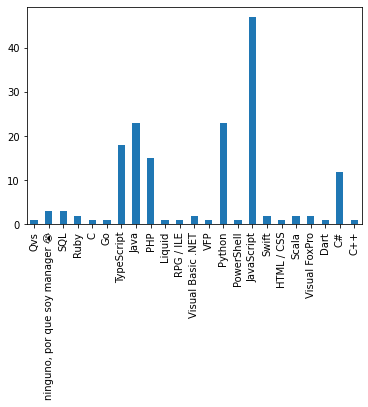

In [150]:
#Lenguaje principal usado por los desarrolladores 
junior_less_3m['Lenguaje'].value_counts(sort=False).plot.bar()

<AxesSubplot:>

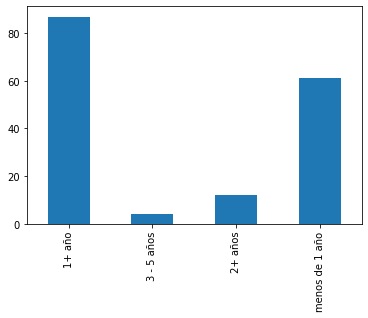

In [198]:
#Años de experiencia
junior_less_3m['AñosExperiencia'].value_counts(sort=False).plot.bar()

<AxesSubplot:ylabel='SalarioJusto'>

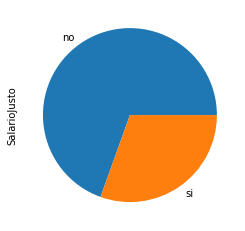

In [153]:
#Consideran los desarrolladores junior que ganan menos de 3m cop , que tienen un salario justo?
junior_less_3m['SalarioJusto'].value_counts(sort=False).plot.pie()

In [154]:
#Desarrolladores junior con salario mensual mayor a 3000000 de pesos
junior_more_3m = juniors_cop[juniors_cop['SalarioMensual'] > 3000000]

In [155]:
junior_more_3m[["MaximoTitulo","SalarioJusto","Lenguaje", "AñosExperiencia","NivelIngles"]]

,MaximoTitulo,SalarioJusto,Lenguaje,AñosExperiencia,NivelIngles
45,pregrado,si,TypeScript,menos de 1 año,avanzado (puede liderar una reunion de varias ...
85,bachiller,no,JavaScript,3 - 5 años,intermedio (puede pasar una entrevista de prog...
88,pregrado,no,Ruby,1+ año,intermedio (puede pasar una entrevista de prog...
119,pregrado,si,JavaScript,1+ año,avanzado (puede liderar una reunion de varias ...
133,pregrado,si,JavaScript,1+ año,intermedio (puede pasar una entrevista de prog...
...,...,...,...,...,...
1632,pregrado,si,Python,1+ año,intermedio (puede pasar una entrevista de prog...
1653,pregrado,no,Terraform,1+ año,avanzado (puede liderar una reunion de varias ...
1657,pregrado,no,PHP,3 - 5 años,avanzado (puede liderar una reunion de varias ...
1658,pregrado,no,PHP,3 - 5 años,avanzado (puede liderar una reunion de varias ...


<AxesSubplot:>

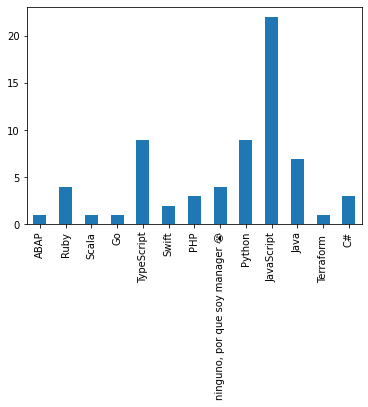

In [156]:
#Lenguaje principal usado por los desarrolladores 
junior_more_3m['Lenguaje'].value_counts(sort=False).plot.bar()

<AxesSubplot:>

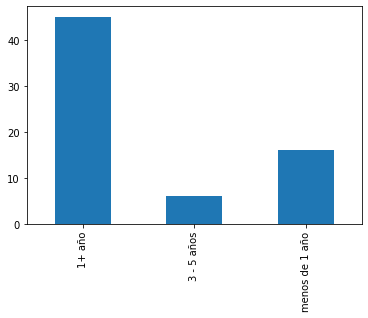

In [158]:
#Años de experiencia
junior_more_3m['AñosExperiencia'].value_counts(sort=False).plot.bar()

<AxesSubplot:ylabel='SalarioJusto'>

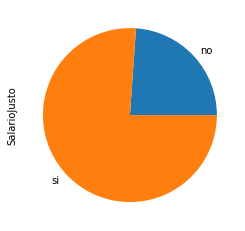

In [159]:
#Consideran los desarrolladores junior que ganan más de 3m cop , que tienen un salario justo?
junior_more_3m['SalarioJusto'].value_counts(sort=False).plot.pie()

In [202]:
#Número de desarrolladores juniors que ganan en cop
juniors_cop.shape[0]

249

In [199]:
#Número de desarrolladores juniors que ganan menos de 3 millones cop
junior_less_3m.shape[0]

164

In [201]:
#Número de desarrolladores juniors que ganan más de 3 millones cop
junior_more_3m.shape[0]

67

In [203]:
#Desarrolladores juniors que ganan en dólares
juniors_dolares = df_dolares[(df_dolares['Titulo'].str.contains("JUNIOR")) | (df_dolares['AñosExperiencia'] == 'menos de 1 año') | (df_dolares['AñosExperiencia'] == '1+ año') ]

In [213]:
#Se obtiene el salario mensual para cada row
juniors_dolares['SalarioMensual'] = juniors_dolares.apply(lambda row: row.SalarioAnual /12, axis=1)

c:\users\desarrollo\.pyenv\pyenv-win\versions\3.7.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [217]:
#Estadisticas descriptivas de los datos
juniors_dolares.describe()

,SalarioAnual,IngresosExtras,SalarioAnualAnterior,TotalAcciones,PrecioEmisionUSD,TotalIngresoAnualFreelance,AñoNacimiento,Hijos,HorasXSemana,SalarioMensual
count,15.00,15.00,15.00,6.00,6.00,15.00,15.00,15.00,13.00,15.00
mean,48892.00,28411.00,24912.00,0.00,0.00,67000.00,1994.60,0.20,39.46,4074.33
std,77398.16,81197.44,77651.74,0.00,0.00,258109.89,3.92,0.56,9.73,6449.85
min,4800.00,0.00,0.00,0.00,0.00,0.00,1988.00,0.00,10.00,400.00
25%,11800.00,0.00,0.00,0.00,0.00,0.00,1991.50,0.00,40.00,983.33
50%,18000.00,0.00,0.00,0.00,0.00,0.00,1996.00,0.00,40.00,1500.00
75%,38000.00,1582.50,1400.00,0.00,0.00,0.00,1998.00,0.00,45.00,3166.67
max,300000.00,300000.00,300000.00,0.00,0.00,1000000.00,2001.00,2.00,50.00,25000.00


In [218]:
juniors_dolares[juniors_dolares["SalarioMensual"] == 25000]

,Timestamp,TipoEmpresa,DedicacionEmpresa,AñosEmpresa,Titulo,EsFundador,TiempoDesarrollo,TiempoGerenciaProyectos,TiempoLiderazgoTecnico,TiempoGerenciaIngenieria,...,SalarioJusto,SitioWebOfertas,Ciudad,PaisNacimiento,AñoNacimiento,Hijos,Pronombre,Minoria,HorasXSemana,SalarioMensual
587,6/30/2020 12:36:39,soy independiente (freelance),consultoría y servicios de desarrollo de softw...,soy independiente,DESARROLLADOR DE SOFTWARE,si,70 - 80%,70 - 80%,70 - 80%,70 - 80%,...,no,NaN,Barranquilla,Colombia,1989,0,él (tradicionalmente se identifica como hombre),no,10.00,25000.00


In [219]:
#Desarrolladores junior con salario mensual mayor a 2000 dolares mensuales
junior_more_2k = juniors_dolares[juniors_dolares['SalarioMensual'] > 2000]

In [220]:
junior_more_2k[["MaximoTitulo","SalarioJusto","Lenguaje", "AñosExperiencia","NivelIngles"]]

,MaximoTitulo,SalarioJusto,Lenguaje,AñosExperiencia,NivelIngles
27,pregrado,si,"ninguno, por que soy manager 😭",1+ año,avanzado (puede liderar una reunion de varias ...
587,pregrado,no,JavaScript,1+ año,básico (puede leer documentación y código en i...
880,bachiller,si,JavaScript,2+ años,avanzado (puede liderar una reunion de varias ...
932,pregrado,si,Ruby,1+ año,intermedio (puede pasar una entrevista de prog...
1123,bachiller,si,JavaScript,menos de 1 año,intermedio (puede pasar una entrevista de prog...
1361,pregrado,no,Java,1+ año,básico (puede leer documentación y código en i...


<AxesSubplot:>

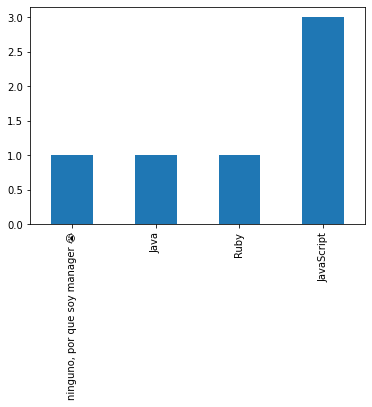

In [228]:
#Lenguaje principal usado por los desarrolladores 
junior_more_2k['Lenguaje'].value_counts(sort=False).plot.bar()

<AxesSubplot:ylabel='SalarioJusto'>

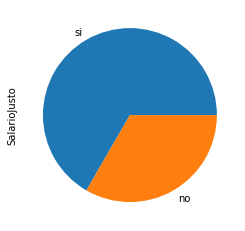

In [226]:
#Consideran los desarrolladores junior que ganan más de 2000 dolares , que tienen un salario justo?
junior_more_2k['SalarioJusto'].value_counts(sort=False).plot.pie()

<AxesSubplot:>

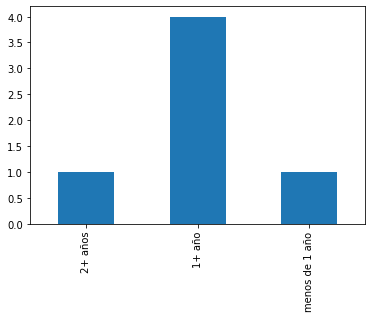

In [231]:
#Años de experiencia
junior_more_2k['AñosExperiencia'].value_counts(sort=False).plot.bar()

In [221]:
#Desarrolladores junior con salario mensual menor a 2000 dolares mensuales
junior_less_2k = juniors_dolares[juniors_dolares['SalarioMensual'] < 2000]

In [232]:
junior_less_2k[["MaximoTitulo","SalarioJusto","Lenguaje", "AñosExperiencia","NivelIngles"]]

,MaximoTitulo,SalarioJusto,Lenguaje,AñosExperiencia,NivelIngles
76,pregrado,no,Elixir,1+ año,avanzado (puede liderar una reunion de varias ...
228,bachiller,si,JavaScript,1+ año,intermedio (puede pasar una entrevista de prog...
254,"técnico, tecnología, bachiller técnico",si,TypeScript,menos de 1 año,intermedio (puede pasar una entrevista de prog...
397,pregrado,no,JavaScript,1+ año,avanzado (puede liderar una reunion de varias ...
577,pregrado,no,C#,menos de 1 año,básico (puede leer documentación y código en i...
878,"técnico, tecnología, bachiller técnico",no,JavaScript,1+ año,básico (puede leer documentación y código en i...
1037,"técnico, tecnología, bachiller técnico",si,JavaScript,1+ año,avanzado (puede liderar una reunion de varias ...
1095,"técnico, tecnología, bachiller técnico",no,JavaScript,1+ año,básico (puede leer documentación y código en i...
1615,pregrado,si,PHP,menos de 1 año,avanzado (puede liderar una reunion de varias ...


<AxesSubplot:ylabel='SalarioJusto'>

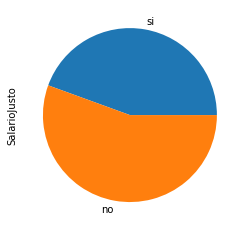

In [227]:
#Consideran los desarrolladores junior que ganan menos de 2000 dolares , que tienen un salario justo?
junior_less_2k['SalarioJusto'].value_counts(sort=False).plot.pie()

<AxesSubplot:>

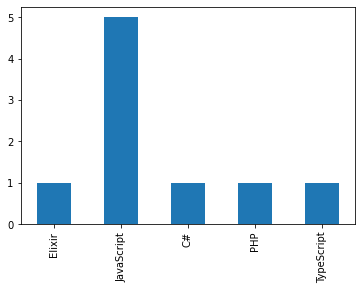

In [233]:
#Lenguaje principal usado por los desarrolladores 
junior_less_2k['Lenguaje'].value_counts(sort=False).plot.bar()

<AxesSubplot:>

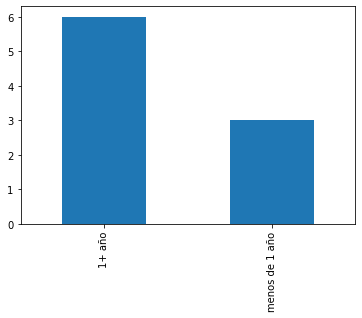

In [234]:
#Años de experiencia
junior_less_2k['AñosExperiencia'].value_counts(sort=False).plot.bar()

In [223]:
#Desarrolladores juniors que ganan en dolares
juniors_dolares.shape[0]

15

In [224]:
#Desarrolladores juniors que ganan en pesos (cop)
juniors_cop.shape[0]

249